Growth rate analysis

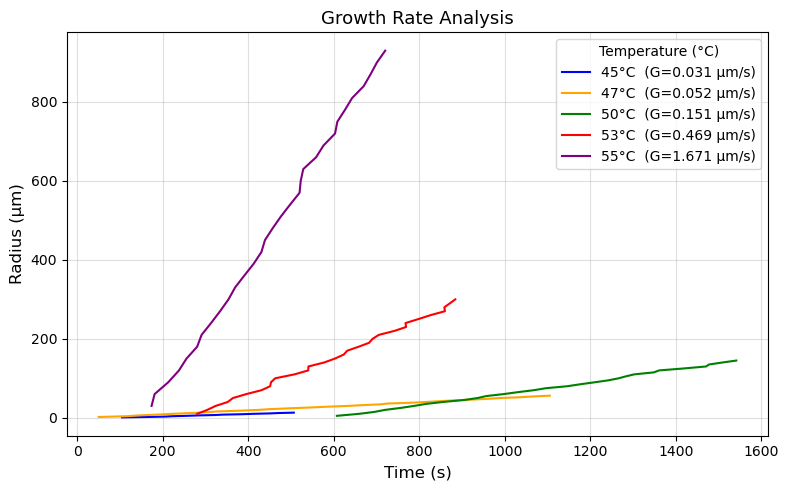

Growth rates for each temperature:
  45°C:  0.0312 µm/s
  47°C:  0.0516 µm/s
  50°C:  0.1511 µm/s
  53°C:  0.4690 µm/s
  55°C:  1.6706 µm/s


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- Temperature values (used in filenames and legend) ----
temps = [45, 47, 50, 53, 55]

# ---- Build file paths automatically ----
base_path = "GR_data/GR_data_"
filepaths = [f"{base_path}{t}.csv" for t in temps]

# ---- Colour cycle (optional) ----
colors = ['blue', 'orange', 'green', 'red', 'purple']

# ---- Plot ----
plt.figure(figsize=(8, 5))
growth_rates = []   # store results for later printout

for t, path, color in zip(temps, filepaths, colors):
    # Read data
    df = pd.read_csv(path, header=0, sep='\t')

    # Extract columns
    time = df['time/s'].values
    radius = df['radius/um'].values

    # ---- Linear fit: radius = G*t + R0 ----
    # (polyfit returns slope first, then intercept)
    slope, intercept = np.polyfit(time, radius, 1)
    growth_rates.append(slope)  # slope in µm/s

    # ---- Plot the raw data ----
    plt.plot(time, radius, lw=1.5, label=f"{t}°C  (G={slope:.3f} µm/s)", color=color)

# ---- Formatting ----
plt.legend(title="Temperature (°C)")
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Radius (µm)', fontsize=12)
plt.title('Growth Rate Analysis', fontsize=13)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.savefig('Growth_Rate_Analysis.png', dpi=1000)
plt.show()

# ---- Print out the results neatly ----
print("Growth rates for each temperature:")
for t, G in zip(temps, growth_rates):
    print(f"  {t}°C:  {G:.4f} µm/s")


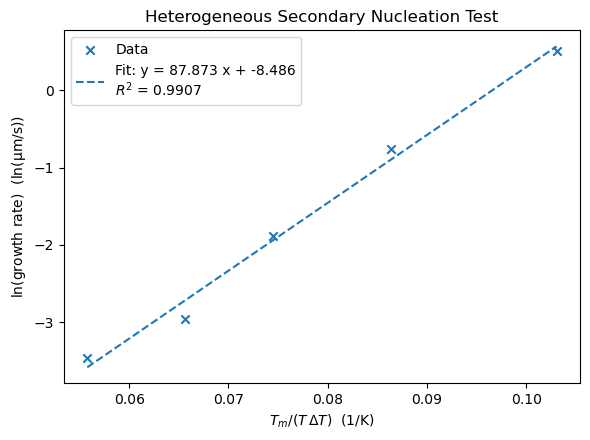

Fit parameters:
  Slope a = 87.872826
  Intercept b = -8.485749
  R^2 = 0.990724
Figure saved to: /mnt/data/hetero_secondary_nucleation_plot.png


In [34]:
# Compute and plot ln(growth rate) vs Tm/(T*ΔT) for heterogeneous secondary nucleation test

# Input data
Tc_C = np.array([45, 47, 50, 53, 55], dtype=float)
G_um_s = np.array([0.0312, 0.0516, 0.1511, 0.4690, 1.6706])
Tm_C = np.array([64, 63, 64, 65, 65], dtype=float)

Tc_K = Tc_C + 273.15
Tm_K = Tm_C + 273.15

# Undercooling ΔT (in K)
deltaT = Tm_K - Tc_K

# x = Tm / (T * ΔT), y = ln(G)
x = Tm_K / (Tc_K * deltaT)
y = np.log(G_um_s)  # natural log

# Linear regression (y = a*x + b)
a, b = np.polyfit(x, y, 1)
y_fit = a * x + b

# R^2
ss_res = np.sum((y - y_fit)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - ss_res/ss_tot

df = pd.DataFrame({
    'Tc (°C)': Tc_C,
    'Tm (°C)': Tm_C,
    'ΔT (K)': deltaT,
    'Growth (µm/s)': G_um_s,
    'ln(Growth)': y,
    'Tm/(T*ΔT) (1/K)': x
})

plt.figure(figsize=(6,4.5))
plt.scatter(x, y, marker='x', label='Data')
plt.plot(x, y_fit, linestyle='--', label=f'Fit: y = {a:.3f} x + {b:.3f}\n$R^2$ = {r2:.4f}')
plt.xlabel(r'$T_m / (T\,\Delta T)$  (1/K)')
plt.ylabel(r'$\ln(\mathrm{growth\ rate})$  (ln(µm/s))')
plt.title('Heterogeneous Secondary Nucleation Test')
plt.legend()
plt.tight_layout()
plt.savefig('Nucleation_Mechanism_Analysis', dpi=1000)
plt.show()

print("Fit parameters:")
print(f"  Slope a = {a:.6f}")
print(f"  Intercept b = {b:.6f}")
print(f"  R^2 = {r2:.6f}")
print(f"Figure saved to: {fig_path}")


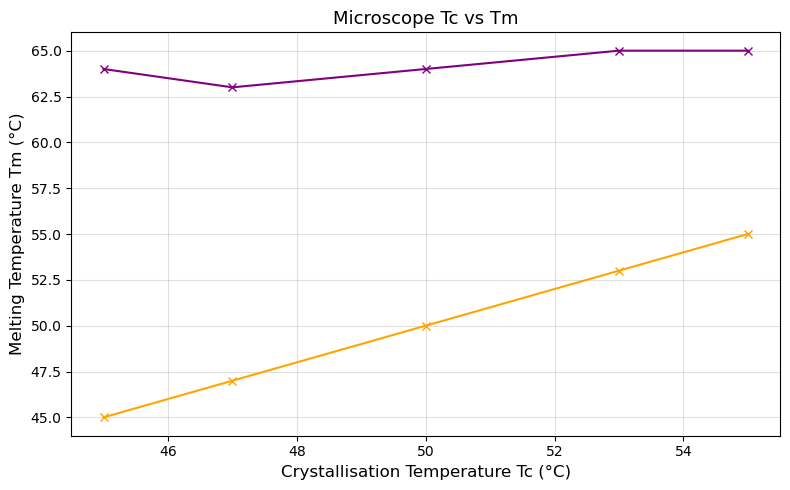

In [35]:
df2 = pd.read_csv('GR_data/TC_TM_data.csv', header=0, sep='\t')

plt.figure(figsize=(8, 5))
plt.plot(df2['Tc'], df2['Tm'], marker='x', linestyle='-', color='purple')
plt.plot(df2['Tc'], df2['Tc_Tm'], marker='x', linestyle='-', color='orange')
plt.xlabel('Crystallisation Temperature Tc (°C)', fontsize=12)
plt.ylabel('Melting Temperature Tm (°C)', fontsize=12)
plt.title('Microscope Tc vs Tm', fontsize=13)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.savefig('Microscope_Tm_vs_Tc.png', dpi=1000)
plt.show()

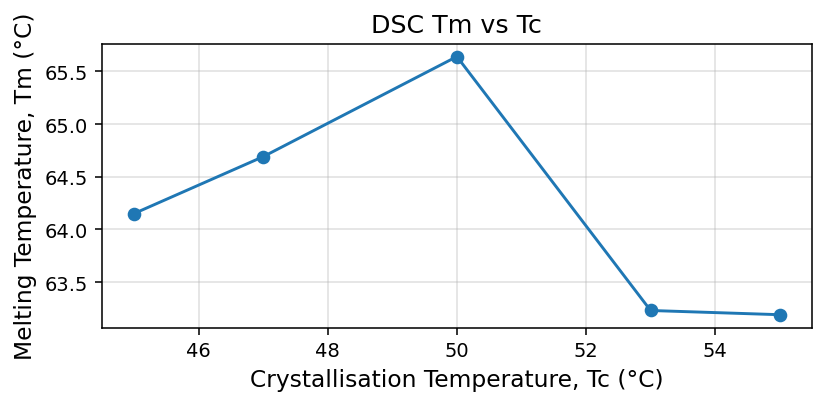

In [36]:
df = pd.read_csv("DSC_data/DSC_Tm_Tc.csv")

# --- Plot ---
plt.figure(figsize=(6, 3), dpi=140)
plt.plot(df['Tc'], df['Tm'], marker='o', color='tab:blue', lw=1.5)

# --- Formatting ---
plt.title('DSC Tm vs Tc', fontsize=13)
plt.xlabel('Crystallisation Temperature, Tc (°C)', fontsize=12)
plt.ylabel('Melting Temperature, Tm (°C)', fontsize=12)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.savefig('DSC_Tm_vs_Tc.png', dpi=1000)
plt.show()